In [2]:
import pandas as pd
import numpy as np
from numpy import log
from pmdarima import auto_arima
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('dataset/monthly_champagne_sales.csv')
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [7]:
df['Month']=pd.to_datetime(df['Month'])

In [9]:
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [10]:
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [11]:
df.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [12]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


### CONTROLLO STAZIONARIETÀ

In [13]:
result = adfuller(df.Sales.dropna())
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistics: -1.833593
p-value: 0.363916


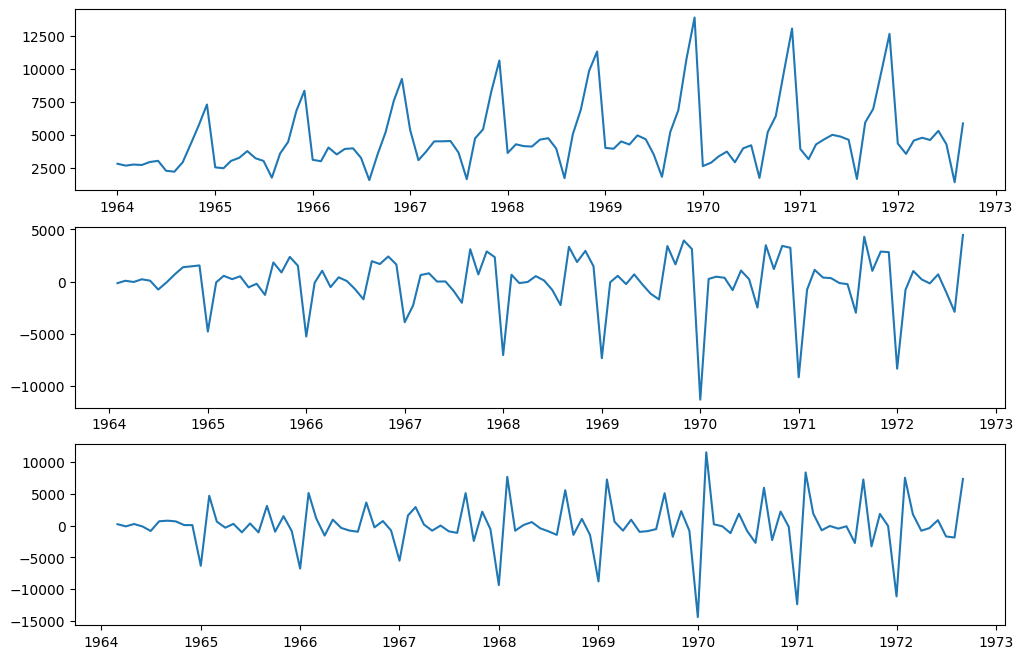

In [15]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(df.Sales)

ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(df.Sales.diff().dropna())

ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(df.Sales.diff().diff().dropna())

plt.show()

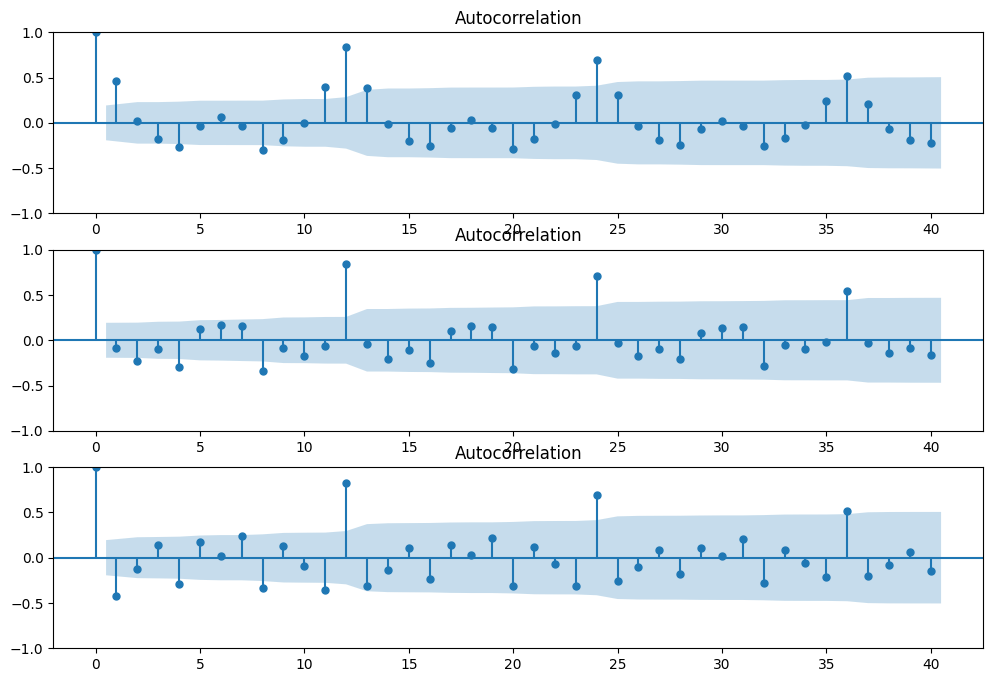

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(3, 1, 1)
fig = sm.graphics.tsa.plot_acf(df['Sales'][1:], lags=40, ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
fig = sm.graphics.tsa.plot_acf(df['Sales'].diff().dropna()[1:], lags=40, ax=ax2)

ax3 = fig.add_subplot(3, 1, 3)
fig = sm.graphics.tsa.plot_acf(df['Sales'].diff().diff().dropna()[1:], lags=40, ax=ax3)

plt.show()

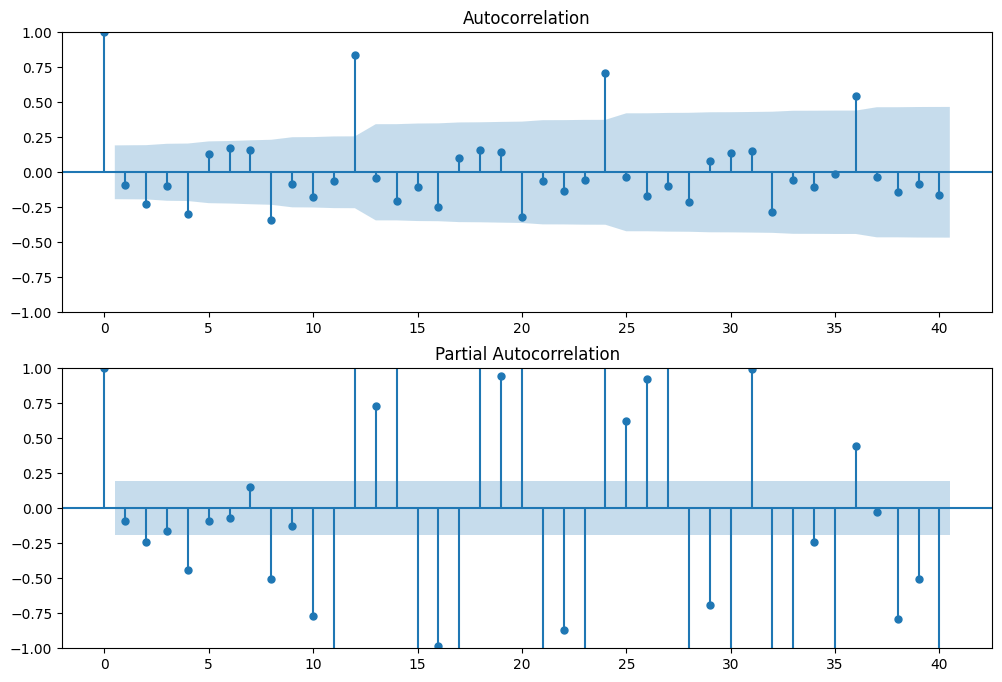

In [18]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales'].diff()[1:], lags=40, ax=ax1) 

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales'].diff()[1:], lags=40, ax=ax2)

### AUTOMATIC ALGORITM THAT CONFIRM VALUES FOR ARIMA & SARIMAX

In [19]:
stwpwise_fit = auto_arima(df['Sales'], trace=True, suppress_warnings=True)
stwpwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1937.732, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1938.874, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1937.889, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1935.750, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.303 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -966.875
Date:                Wed, 14 Dec 2022   AIC                           1935.750
Time:                        19:41:10   BIC                           1938.394
Sample:                    01-01-1964   HQIC                          1936.821
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.895e+06   5.29e+05     13.025      0.000    5.86e+06    7.93e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               139.51
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               4.62   Skew:                            -1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA MODEL FIT

In [20]:
model = ARIMA(df.Sales, order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -966.875
Date:                Wed, 14 Dec 2022   AIC                           1935.750
Time:                        19:41:26   BIC                           1938.394
Sample:                    01-01-1964   HQIC                          1936.821
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.895e+06   5.29e+05     13.025      0.000    5.86e+06    7.93e+06
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               139.51
Prob(Q):                              0.35   Pr

### PLOT RESIDUAL ERRORS & VALUES DISTRIBUTION

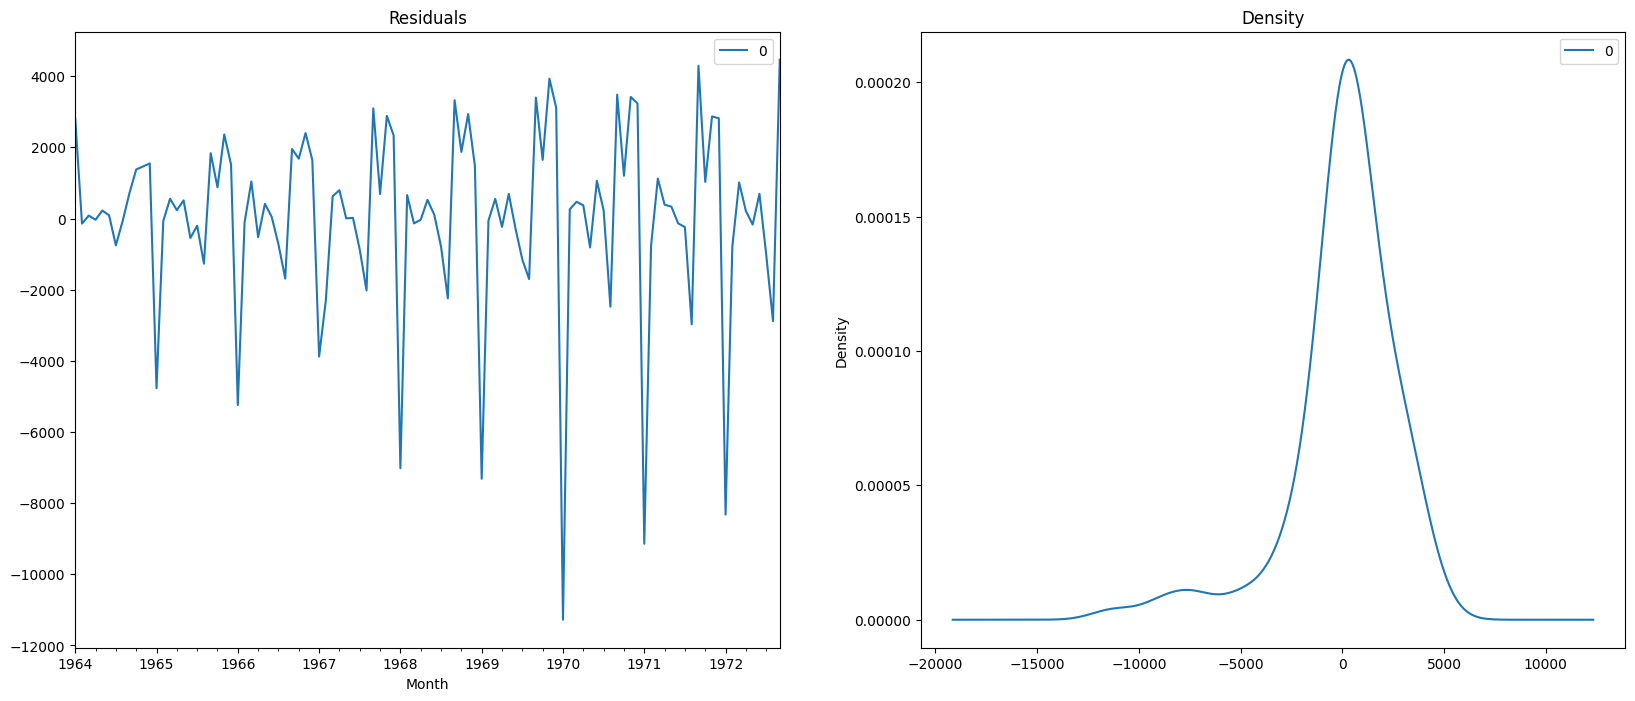

In [21]:
residuals = pd.DataFrame(model_fit.resid)
fig = plt.figure(figsize=(20, 8))
ax = fig.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

### ACTUAL VS FITTED (ARIMA HAS NO SEASONAL VALUE)

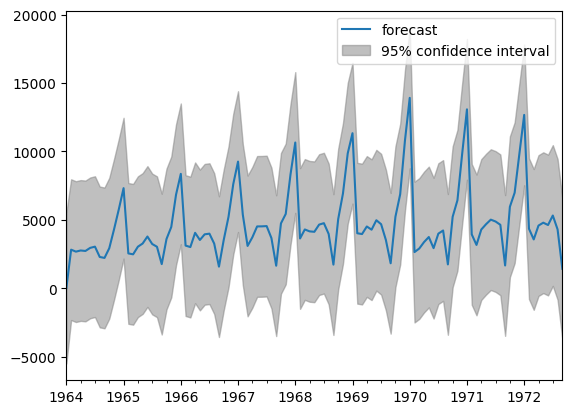

In [22]:
from statsmodels.graphics.tsaplots import plot_predict 
plot_predict(model_fit)
plt.show()

### SEPARATION OF MEAN & STD

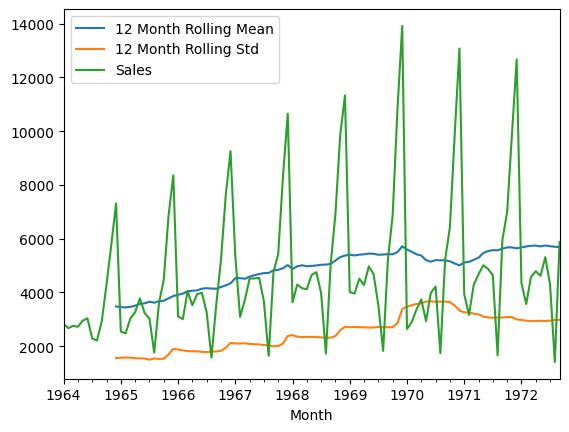

In [23]:
df['Sales'].rolling(12).mean().plot(label='12 Month Rolling Mean')
df['Sales'].rolling(12).std().plot(label='12 Month Rolling Std')
df['Sales'].plot()
plt.legend()

### PLOT TREND - SEASONAL - RESID

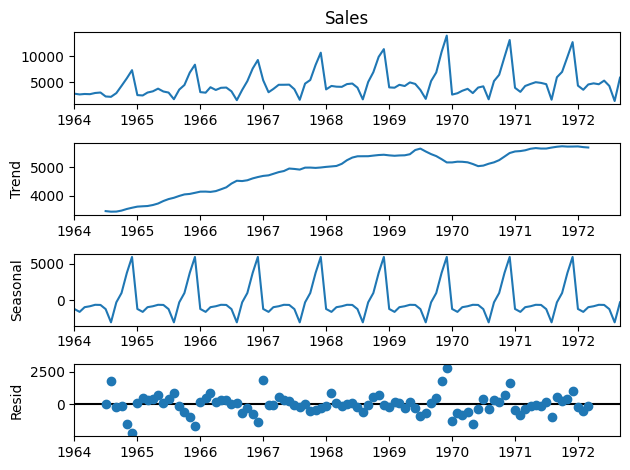

In [27]:
decomp = seasonal_decompose(df['Sales'],period=12)
fig = decomp.plot()

### CREATION OF TRAIN DATASET & TEST DATASET

In [28]:
train = df.Sales[:80]
test = df.Sales[80:]
print("Train:"+str(len(train))+"    "+"Test:"+str(len(test)))

Train:80    Test:25


### SARIMAX PREDICTION

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10976D+00    |proj g|=  5.17619D-01

At iterate    5    f=  6.97985D+00    |proj g|=  1.29539D-02

At iterate   10    f=  6.97777D+00    |proj g|=  6.96632D-04

At iterate   15    f=  6.97710D+00    |proj g|=  1.79356D-02


 This problem is unconstrained.



At iterate   20    f=  6.95966D+00    |proj g|=  4.28138D-02

At iterate   25    f=  6.95715D+00    |proj g|=  4.15382D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   1.899D-05   6.957D+00
  F =   6.9571451964630118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<AxesSubplot: xlabel='Month'>

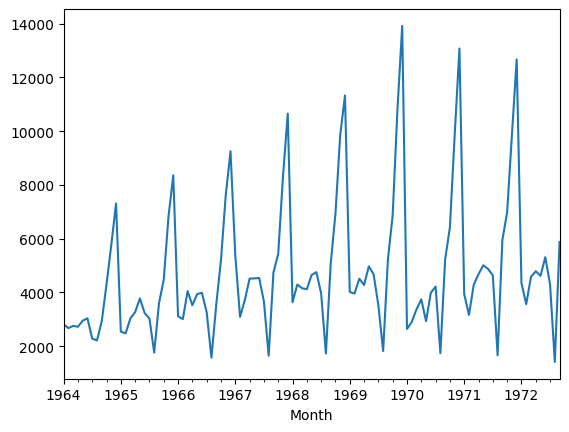

In [29]:
model = sm.tsa.statespace.SARIMAX(train, order=(0, 1, 0), seasonal_order=(1, 1, 1, 12))
fitted = model.fit()

df['forecast'] = fitted.predict(start=450, end=600, dynamic=True)
df['Sales'].plot()
df['forecast'].plot()